In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

# Load data
data = pd.read_excel('VIJ-VIZ-TIR.xlsx', sheet_name=2)

# Assuming 'totalx' is the target variable to be predicted
target_variable = 'totalx'

# Filter data for the relevant months (3, 4, 5)
filtered_data = data[data['month'].isin([3, 4, 5])]

# Select features and target variable
features = ['d2m', 'blh', 'cp', 'cin']
X = filtered_data[features].values
y = filtered_data[target_variable].values.reshape(-1, 1)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape data for RNN
n_steps = 3
X_rnn = np.array([X[i - n_steps:i, :] for i in range(n_steps, len(X))])
y_rnn = y[n_steps:]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rnn, y_rnn, test_size=0.2, random_state=42)

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(128, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Save the best model during training
checkpoint = ModelCheckpoint('best_rnn_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=64, validation_split=0.2, callbacks=[checkpoint], verbose=1)

# Evaluate the model on the test set
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}, Test MAE: {mae:.4f}')

# Save the final model
model.save('final_rnn_model.h5')


/tmp/ipykernel_11968/994401247.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-02-17 10:12:23.153822: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-17 10:12:23.153919: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-17 10:12:23.154887: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable t

Epoch 1/150


2024-02-17 10:12:30.656502: I external/local_xla/xla/service/service.cc:168] XLA service 0x7ff23dddef20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-17 10:12:30.656581: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-02-17 10:12:30.663212: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-17 10:12:30.684463: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1708144950.791949   12037 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


33/34 [============================>.] - ETA: 0s - loss: 1610.9403 - mae: 39.7394
Epoch 1: val_loss improved from inf to 969.67780, saving model to best_rnn_model.h5
34/34 [==============================] - 3s 24ms/step - loss: 1597.5413 - mae: 39.5550 - val_loss: 969.6778 - val_mae: 30.5236
Epoch 2/150
10/34 [=======>......................] - ETA: 0s - loss: 657.6577 - mae: 24.5078

/home/fitzingout/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


33/34 [============================>.] - ETA: 0s - loss: 356.8546 - mae: 14.2858
Epoch 2: val_loss improved from 969.67780 to 181.31258, saving model to best_rnn_model.h5
34/34 [==============================] - 1s 18ms/step - loss: 351.6411 - mae: 14.1454 - val_loss: 181.3126 - val_mae: 8.3482
Epoch 3/150
34/34 [==============================] - ETA: 0s - loss: 88.6387 - mae: 6.9324
Epoch 3: val_loss improved from 181.31258 to 89.99711, saving model to best_rnn_model.h5
34/34 [==============================] - 1s 15ms/step - loss: 88.6387 - mae: 6.9324 - val_loss: 89.9971 - val_mae: 6.2633
Epoch 4/150
34/34 [==============================] - ETA: 0s - loss: 52.8212 - mae: 5.4278
Epoch 4: val_loss improved from 89.99711 to 65.08598, saving model to best_rnn_model.h5
34/34 [==============================] - 1s 17ms/step - loss: 52.8212 - mae: 5.4278 - val_loss: 65.0860 - val_mae: 5.4475
Epoch 5/150
31/34 [==========================>...] - ETA: 0s - loss: 42.7594 - mae: 4.8918
Epoch 5: v

In [2]:
# New input data
new_d2m = 296.907
new_blh = 461.283
new_cp = 0.0000363533
new_cin = 202.997

# Assuming you have new input data for the features 'd2m', 'blh', 'cp', and 'cin'
new_input_data = np.array([[new_d2m, new_blh, new_cp, new_cin]])

# Standardize the new input data using the same scaler used for training data
new_input_data_scaled = scaler.transform(new_input_data)

# Reshape the new input data for RNN with 3 time steps
new_input_data_rnn = np.array([new_input_data_scaled[0, :]] * n_steps)
new_input_data_rnn = new_input_data_rnn.reshape((1, n_steps, len(features)))

# Make predictions with the trained RNN model
predicted_output = model.predict(new_input_data_rnn)

print(f'Predicted Output: {predicted_output[0, 0]}')


1/1 [==============================] - 0s 278ms/step
Predicted Output: 43.18812942504883


22/22 [==============================] - 0s 9ms/step
Mean Squared Error: 20.1073
Mean Absolute Error: 3.3978
R^2: 0.1446


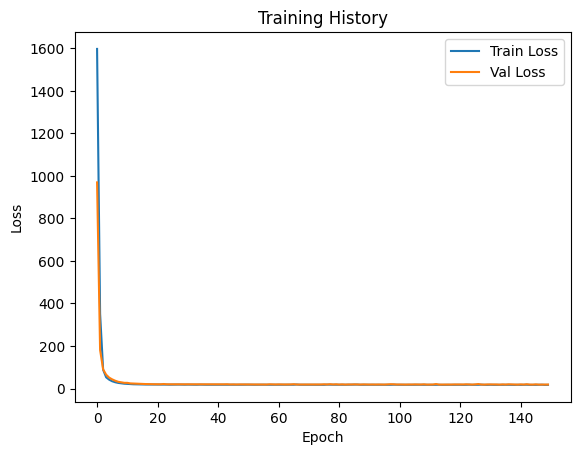

In [3]:
#error calculation
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R^2: {r2:.4f}')


# Plot training history
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [12]:
#now lets make a new excel file and there we will put the predicted values input and the actual values
y_pred = y_pred.flatten()
y_test = y_test.flatten()
#inputs 
df1 = pd.DataFrame({'d2m': X_test[:, -1, 0], 'blh': X_test[:, -1, 1], 'cp': X_test[:, -1, 2], 'cin': X_test[:, -1, 3]})
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#save df1 and df to in same excel file same sheet  both side by side
df1['Predicted'] = df['Predicted']
df1['Actual'] = df['Actual']
df1.to_excel('predicted_values.xlsx', index=False)
#for different sheets

#with pd.ExcelWriter('predicted_values.xlsx') as writer:
    #df1.to_excel(writer, sheet_name='Inputs', index=False)
    #df.to_excel(writer, sheet_name='Predicted', index=False)
    
print(df1,df)


          d2m       blh        cp       cin  Predicted   Actual
0   -1.694248 -0.961623 -0.166117  0.864444  49.723122  48.3623
1   -1.185168  1.424746 -0.166117 -1.156247  44.186901  44.3281
2   -0.564799  0.042792 -0.166117 -1.156247  41.516487  49.8896
3    0.290135 -0.566067 -0.166117  0.870798  43.732674  38.9720
4    1.360230  0.065791 -0.166117  0.879044  44.014668  41.1313
..        ...       ...       ...       ...        ...      ...
672 -0.236066  0.242037 -0.166117  0.884106  43.564754  47.0852
673  0.491598 -1.145458 -0.166117 -1.156247  40.185757  37.5029
674  0.392294  0.426480 -0.156476  0.870327  44.061253  41.9176
675  1.296880 -0.658805 -0.166117  0.860871  42.081638  44.9952
676 -1.594943  1.623218 -0.166117 -1.156247  42.328815  43.8867

[677 rows x 6 columns]       Actual  Predicted
0    48.3623  49.723122
1    44.3281  44.186901
2    49.8896  41.516487
3    38.9720  43.732674
4    41.1313  44.014668
..       ...        ...
672  47.0852  43.564754
673  37.5029  40